# Generalized Linear Model

https://en.wikipedia.org/wiki/Generalized_linear_model

## Gaussian Linear Model

$$
Y = a + b X + \epsilon, \quad \epsilon \sim N(0,1)
$$

regression function $\mu(x) = E[Y|X=x] = a+bx$ is already linear.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import ipywidgets as widgets
from ipywidgets import interact

# Interactive plot function
def plot_interactive(x=4, a=0.5, b=1, var_noise=1):
    # Ensure variance of noise is positive
    var_noise = max(var_noise, 1e-6)  # Prevent non-positive values

    # Generate data
    #np.random.seed(42)  # For reproducibility
    n = 100  # Number of points
    X = np.random.uniform(-10, 10, n)  # X values sampled uniformly
    noise = np.random.normal(0, np.sqrt(var_noise), n)  # Gaussian noise
    Y = a + b * X + noise  # Y values

    mean_mu_x = a + b * x
    mu = np.linspace(-3 * np.sqrt(var_noise) + mean_mu_x, 
                      3 * np.sqrt(var_noise) + mean_mu_x, 500)
    pdf_mu = norm.pdf(mu, loc=mean_mu_x, scale=np.sqrt(var_noise))

    plt.figure(figsize=(10, 6))
    plt.scatter(X, Y, color='blue', alpha=0.5, label='Sampled (Xi, Yi)')
    plt.plot(np.sort(X), a + b * np.sort(X), color='red', linewidth=2, 
             label=r'$\mu(x) = E[Y|X=x] = $' + f"{a:.2f}+{b:.2f}" + '$x$')
    plt.plot(x + pdf_mu, mu, color="green", 
             label=f"$Y|X=x \\sim N({mean_mu_x:.1f}, {var_noise:.1f})$")
    plt.axvline(x=x, color="green", linestyle="--", 
                label=f"x={x:.4f}", linewidth=0.7)
    plt.axhline(0, color='black', linewidth=0.7, linestyle='--')
    plt.axvline(0, color='black', linewidth=0.7, linestyle='--')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title(f'Linear Regression: Y = {a:.4f} + {b:.4f}X + Noise')
    plt.legend()
    plt.grid(alpha=0.3)
    plt.show()


def reset_parameters(b):
    x_slider.value = 4
    a_slider.value = 0.5
    b_slider.value = 1.0
    var_noise_slider.value = 1.0

# Style for sliders
slider_style = {'description_width': '150px'}  # Increase text width for descriptions
slider_layout = widgets.Layout(width='500px')  # Make sliders wider

x_slider = widgets.FloatSlider(value=4, min=-10, max=10, step=0.1, description='Value of x:', style=slider_style, layout=slider_layout)
a_slider = widgets.FloatSlider(value=0.5, min=-2, max=2, step=0.1, description='Intercept (a):', style=slider_style, layout=slider_layout)
b_slider = widgets.FloatSlider(value=1.0, min=-2, max=2, step=0.1, description='Slope (b):', style=slider_style, layout=slider_layout)
var_noise_slider = widgets.FloatSlider(value=1, min=0.1, max=5, step=0.1, description='Variance of Noise:', style=slider_style, layout=slider_layout)

# Create a reset button
reset_button = widgets.Button(description="Reset", layout=widgets.Layout(width='400px'))
reset_button.on_click(reset_parameters)

# Display the widgets
display(reset_button)

# Create interactive widget
interact(
    plot_interactive, 
    x=x_slider,
    a=a_slider,
    b=b_slider,
    var_noise=var_noise_slider,
);


Button(description='Reset', layout=Layout(width='400px'), style=ButtonStyle())

interactive(children=(FloatSlider(value=4.0, description='Value of x:', layout=Layout(width='500px'), max=10.0…

## Logit Link function

$$
g(\mu) = \log\left(\mu/(1-\mu)\right)
$$

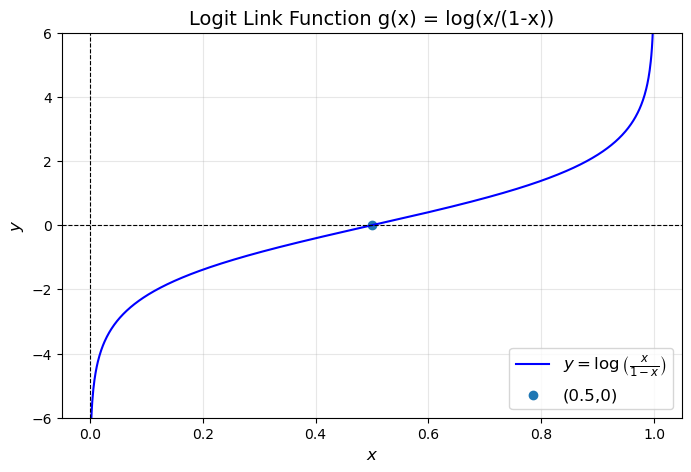

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define the logit function
def logit(x):
    return np.log(x / (1 - x))

# Define x values in (0, 1) excluding boundaries to avoid division by zero/log issues
x = np.linspace(0.001, 0.999, 1000)
y = logit(x)

# Plot the logit function
plt.figure(figsize=(8, 5))
plt.plot(x, y, label=r"$y = \log\left(\frac{x}{1-x}\right)$", color="blue")
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')
plt.axvline(0, color='black', linewidth=0.8, linestyle='--')
plt.scatter(0.5, 0, label="(0.5,0)")
plt.title("Logit Link Function g(x) = log(x/(1-x))", fontsize=14)
plt.xlabel("$x$", fontsize=12)
plt.ylabel("$y$", fontsize=12)
plt.ylim(-6, 6)
plt.grid(alpha=0.3)
plt.legend(fontsize=12)
plt.show()


## Logistic Regression

$$
Y|X=x \sim Ber(p(x)) \quad
$$

Regression function $\mu(x) = E[Y|X=x]$ is not linear.

https://en.wikipedia.org/wiki/Logistic_regression

## $Y|X=x \sim Ber(p(x)) $

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact,IntSlider, FloatSlider, Button, HBox, VBox



# Interactive function for plotting
def plot_logistic(beta_0=0, beta_1=1, n=100):
    # Generate data
    np.random.seed(42)  # For reproducibility
    X = np.random.uniform(-10, 10, n)  # X values sampled uniformly
    X.sort()

    # Logistic function to model p(x)
    p_x = 1 / (1 + np.exp(-(beta_0 + beta_1 * X)))  # Logistic probability

    # Generate Y values from Bernoulli distribution
    Y = np.random.binomial(1, p_x)
    mu = p_x  # Predicted probabilities (mean response)

    # Theta = x * beta_1 + beta_0
    t = np.linspace(min(X)-1, max(X)+1, 5000)
    g_mu = beta_1 * t + beta_0
    VERY_LARGE_Y = max(g_mu)  # Arbitrarily large value to represent "infinity"
    VERY_SMALL_Y = min(g_mu)
    g_X = ((Y > 0) * (VERY_LARGE_Y - VERY_SMALL_Y) + VERY_SMALL_Y) 

    # Create the plots
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    # Plot 1: Logistic function and sampled points
    axes[0].scatter(X, Y, color='blue', alpha=0.5, label='Sampled (Xi, Yi)')
    axes[0].plot(X, mu, color='red', linewidth=2, label=r'$\mu(x) = E[Y|X=x] = \frac{1}{1 + e^{-(\beta_0 + \beta_1 x)}}$')
    axes[0].axhline(0, color='black', linewidth=0.7, linestyle='--')
    axes[0].axvline(0, color='black', linewidth=0.7, linestyle='--')
    axes[0].set_xlabel('$X$', fontsize=12)
    axes[0].set_ylabel('$Y$', fontsize=12)
    axes[0].set_title('Logistic Regression: $Y | X=x \\sim \\text{Bernoulli}(p(x))$', fontsize=14)
    axes[0].legend(fontsize=12)
    axes[0].grid(alpha=0.3)

    # Plot 2: Linear predictor (theta) and g_X
    axes[1].plot(t, g_mu, color='red', alpha=0.9, label='$g(\\mu(X)) = X \\beta_1 + \\beta_0$')
    axes[1].scatter(X, g_X, color='blue', alpha=0.5, label=r'$(X_i, \pm \infty)$', s=30)
    axes[1].axhline(0, color='black', linewidth=0.7, linestyle='--')
    axes[1].axvline(0, color='black', linewidth=0.7, linestyle='--')
    axes[1].set_xlabel('$X$', fontsize=12)
    axes[1].set_ylabel('Linear Predictor $g(X)$ or Assigned Values', fontsize=12)
    axes[1].set_title('$g(\\mu(x))= x \\beta_1 + \\beta_0$', fontsize=14)
    axes[1].legend(fontsize=10)
    axes[1].grid(alpha=0.3)

    plt.tight_layout()
    plt.show()

# Sliders for beta_0 and beta_1
beta_0_slider = FloatSlider(value=0, min=-2, max=2, step=0.1, description=r'$\beta_0$')
beta_1_slider = FloatSlider(value=1, min=-2, max=2, step=0.1, description=r'$\beta_1$')
n_slider = IntSlider(value=100, min=1, max=200, step=1, description=r'$n$')

# Reset button function
def reset_sliders(change):
    beta_0_slider.value = 0
    beta_1_slider.value = 1
    n_slider.value = 100

# Create reset button
reset_button = Button(description="Reset", button_style="success")
reset_button.on_click(reset_sliders)

# Layout with sliders and reset button
ui = VBox([HBox([beta_0_slider, beta_1_slider, n_slider]), reset_button])

# Interactive plot
out = interact(plot_logistic, beta_0=beta_0_slider, beta_1=beta_1_slider, n=n_slider)

# Display the UI
display(ui)


interactive(children=(FloatSlider(value=0.0, description='$\\beta_0$', max=2.0, min=-2.0), FloatSlider(value=1…

## $Y|X \sim Binomial(m, p_x)$


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact,IntSlider, FloatSlider, Button, HBox, VBox

# Generate data
n = 100  # Number of points
m = 50 # number of trials
np.random.seed(42)  # For reproducibility


# Interactive function for plotting
def plot_logistic(beta_0=0, beta_1=1, n=100, m=100):
    # X values sampled uniformly
    X = np.random.uniform(-10, 10, n)  
    X.sort()
    
    # Generate Y values from Bernoulli distribution
    p_x = 1 / (1 + np.exp(-(beta_0 + beta_1 * X)))  # Logistic probability
    Y = np.random.binomial(m, p_x)

    # remove Y=0
    X_removed = X.copy()[(Y == 0) | (Y == m)]
    Y_removed = Y.copy()[(Y == 0) | (Y == m)]
    p_x_removed = p_x.copy()[(Y == 0) | (Y == m)]
    where = (Y != 0) & (Y != m)
    X = X[where]
    Y = Y[where]
    p_x = p_x[where]

    
    # Theta = x * beta_1 + beta_0
    X_min = np.min(np.concatenate((X, X_removed) ))
    X_max = np.max(np.concatenate((X, X_removed) ))
    t = np.linspace(X_min-1, X_max+1, 5000)
    g_mu = beta_1 * t + beta_0
    g_Y = np.log(Y/(m-Y))
    mu = m  / (1 + np.exp(-(beta_0 + beta_1 * t)))

    # Create the plots
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    # Plot 1: Logistic function and sampled points
    axes[0].scatter(X, Y, color='blue', alpha=0.5, label='Sampled (Xi, Yi)')
    axes[0].scatter(X_removed, Y_removed, alpha=0.5, label=f'(Xi, 0) or (Xi,{m})')
    axes[0].plot(t, mu, color='red', linewidth=2, label=r'$\mu(x) = E[Y|X=x] = \frac{m}{1 + e^{-(\beta_0 + \beta_1 x)}}$')
    axes[0].axhline(0, color='black', linewidth=0.7, linestyle='--')
    axes[0].axvline(0, color='black', linewidth=0.7, linestyle='--')
    axes[0].set_xlabel('$X$', fontsize=12)
    axes[0].set_ylabel('$Y$', fontsize=12)
    axes[0].set_title('$Y | X=x \\sim \\text{Binomial}(m,p(x))$', fontsize=14)
    axes[0].legend(fontsize=10)
    axes[0].grid(alpha=0.3)

    # Plot 2: Linear predictor (theta) and g_X
    axes[1].plot(t, g_mu, color='red', alpha=0.9, label='$g(\\mu(X)) = X \\beta_1 + \\beta_0$')
    axes[1].scatter(X, g_Y, color='blue', alpha=0.5, label=r'$(X_i, Y_i)$', s=30)
    axes[1].axhline(0, color='black', linewidth=0.7, linestyle='--')
    axes[1].axvline(0, color='black', linewidth=0.7, linestyle='--')
    axes[1].set_xlabel('$X$', fontsize=12)
    axes[1].set_ylabel('Linear Predictor $g(X)$ or Assigned Values', fontsize=12)
    axes[1].set_title('$g(\\mu(x))= x \\beta_1 + \\beta_0$', fontsize=14)
    axes[1].legend(fontsize=10)
    axes[1].grid(alpha=0.3)

    

    plt.tight_layout()
    plt.show()


# Sliders for beta_0 and beta_1
beta_0_slider = FloatSlider(value=0, min=-2, max=2, step=0.1, description=r'$\beta_0$')
beta_1_slider = FloatSlider(value=1, min=-2, max=2, step=0.1, description=r'$\beta_1$')
n_slider = IntSlider(value=100, min=1, max=200, step=1, description=r'$n$ points')
m_slider = IntSlider(value=100, min=1, max=200, step=1, description=r'$m$ trials')

# Reset button function
def reset_sliders(change):
    beta_0_slider.value = 0
    beta_1_slider.value = 1
    n_slider.value = 100
    m_slider.value = 100

# Create reset button
reset_button = Button(description="Reset", button_style="success")
reset_button.on_click(reset_sliders)

# Layout with sliders and reset button
ui = VBox([HBox([beta_0_slider, beta_1_slider, n_slider, m_slider]), reset_button])

# Interactive plot
out = interact(plot_logistic, beta_0=beta_0_slider, beta_1=beta_1_slider, n=n_slider, m=m_slider)

# Display the UI
display(ui)

interactive(children=(FloatSlider(value=0.0, description='$\\beta_0$', max=2.0, min=-2.0), FloatSlider(value=1…

## Poisson Regression

$$
Y|X=x \sim \text{Poisson}\left( \mu(x)=e^{ax+b} \right)
$$

* Canonical parameter: $\theta$
* $\theta = g(\mu(x)) = log(\mu(x))=ax+b$
* $g: \mu(x)  \longmapsto g(\mu(x)) = ax+b$
* $g: Y_i  \longmapsto g(Y_i)$


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider



# Function to update the plot based on parameters a and b
def update_plot(a=0.5, b=1, n=100):
    # Generate data
    X = np.random.uniform(0, 5, n)
    X.sort()

    mu_x = np.exp(a * X + b)
    Y = np.random.poisson(mu_x)

    # Remove 0 from Y
    X_removed = X.copy()[Y == 0]
    Y_removed = np.zeros(sum(Y == 0))
    where = Y != 0
    Y = Y[where]
    X = X[where]

    Xmin = np.min(np.concatenate((X, X_removed)))
    Xmax = np.max(np.concatenate((X, X_removed)))

    t = np.linspace(Xmin- 1, Xmax+1)
    regression_line = np.exp(a * t + b)
    g_Y = np.log(Y)

    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    axes = axes.flatten()

    # Plot 1: Poisson regression data
    axes[0].scatter(X, Y, label="$(X_i,Y_i)$", color='blue', alpha=0.5)
    axes[0].scatter(X_removed, Y_removed, label="$(X_i, 0)$", alpha=0.5)
    axes[0].plot(t, regression_line, label="$\\mu(x)=E[Y|X=x]=e^{ax+b}$", color='red')
    axes[0].set_title("$Y|X=x\\sim$ Poisson$(e^{ax+b})$ ")
    axes[0].axhline(0, color='black', linewidth=0.7, linestyle='--')
    axes[0].axvline(0, color='black', linewidth=0.7, linestyle='--')
    axes[0].legend(fontsize=10)
    axes[0].grid(alpha=0.3)

    # Plot 2: Log-transformed data
    axes[1].scatter(X, g_Y, color="blue", label="$(X_i,\\log(Y_i))$", alpha=0.5)
    axes[1].plot(t, a * t + b, label="$g(\\mu(x))=ax+b$", color="red")
    axes[1].set_title("$g(\\mu(x))=ax+b$")

    axes[1].axhline(0, color='black', linewidth=0.7, linestyle='--')
    axes[1].axvline(0, color='black', linewidth=0.7, linestyle='--')
    axes[1].legend(fontsize=10)
    axes[1].grid(alpha=0.3)

    plt.tight_layout()
    plt.show()


# Sliders
a_slider = FloatSlider(value=0.5, min=-5, max=2, step=0.1, description=r'slope $a$')
b_slider = FloatSlider(value=1, min=-5, max=5, step=0.1, description=r'intercept $b$')
n_slider = IntSlider(value=100, min=1, max=200, step=0.1, description=r'$n$ points')

# Reset button function
def reset_sliders(change):
    a_slider.value = 0.5
    b_slider.value = 0
    n_slider.value = 100

# Create reset button
reset_button = Button(description="Reset", button_style="success")
reset_button.on_click(reset_sliders)

# Layout with sliders and reset button
ui = VBox([HBox([a_slider, b_slider, n_slider]), reset_button])

# Interactive plot
out = interact(update_plot, a=a_slider, b=b_slider, n=n_slider)

# Display the UI
display(ui)


interactive(children=(FloatSlider(value=0.5, description='slope $a$', max=2.0, min=-5.0), FloatSlider(value=1.…